In [1]:
#!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
#!sudo apt-get update
#!sudo -E apt-get install -y /tmp/chrome.deb
#!pip install chromedriver-autoinstaller selenium

In [2]:
#!pip install unidecode

In [3]:
import scrapping.scrapping_ciqual

data_tools importé !
conversion_tools importé !
scraping_marmiton importé ! 
scrapping_ciqual importé !


In [35]:
from scrapping.scrapping_marmiton import find_all_recipes
from scrapping.scrapping_ciqual import nutrition
from tools.data_tools import clean

In [51]:
test = find_all_recipes("végétarien", 2)
print(test)
nutritest = nutrition(test)
test_all = test.merge(nutritest, on='Ingrédient', how='left')

  0%|          | 0/2 [00:00<?, ?it/s]

                        Nom recette          Ingrédient  Quantité
0   Lasagnes végétariennes (facile)              tomate    187.50
1   Lasagnes végétariennes (facile)           courgette    200.00
2   Lasagnes végétariennes (facile)              poivre      2.00
3   Lasagnes végétariennes (facile)                 sel      2.00
4   Lasagnes végétariennes (facile)  herbes de Provence      2.00
5   Lasagnes végétariennes (facile)             lasagne      2.00
6   Lasagnes végétariennes (facile)        gruyere rape    100.00
7   Lasagnes végétariennes (facile)              oignon    100.00
8   Lasagnes végétariennes (facile)       basilic frais      2.00
9   Lasagnes végétariennes (facile)    coulis de tomate     50.00
10  Lasagnes végétariennes (facile)            bechamel    125.00
11     Hachis parmentier végétarien     pommes de terre    175.00
12     Hachis parmentier végétarien             poireau     30.00
13     Hachis parmentier végétarien             carotte     93.75
14     Hac

In [69]:
test_all.pivot(index=['Nom recette'], columns='Nutriment', values='Teneur moyenne')

ValueError: Index contains duplicate entries, cannot reshape

In [64]:
test1 = test_all.loc[test_all['Nom recette'] == 'Lasagnes végétariennes (facile)'] 
test1

,Nom recette,Ingrédient,Quantité,Nutriment,Teneur moyenne
0,Lasagnes végétariennes (facile),tomate,187.5,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)","84,3"
1,Lasagnes végétariennes (facile),tomate,187.5,"Energie, Règlement UE N° 1169/2011 (kcal/100 g)","20,1"
2,Lasagnes végétariennes (facile),tomate,187.5,"Protéines, N x 6.25 (g/100 g)","0,5"
3,Lasagnes végétariennes (facile),tomate,187.5,Glucides (g/100 g),"3,03"
4,Lasagnes végétariennes (facile),tomate,187.5,Lipides (g/100 g),"< 0,5"
...,...,...,...,...,...
86,Lasagnes végétariennes (facile),bechamel,125.0,Glucides (g/100 g),"6,2"
87,Lasagnes végétariennes (facile),bechamel,125.0,Lipides (g/100 g),"7,4"
88,Lasagnes végétariennes (facile),bechamel,125.0,Sucres (g/100 g),"3,1"
89,Lasagnes végétariennes (facile),bechamel,125.0,AG saturés (g/100 g),"4,61"


In [70]:
test1.pivot(index=['Nom recette', 'Ingrédient', 'Quantité'], columns='Nutriment', values='Teneur moyenne')
test1

ValueError: Index contains duplicate entries, cannot reshape

In [67]:
test2 = find_all_recipes("végétarien", 1)
print(test2)
nutritest = nutrition(test2)
test2 = test2.merge(nutritest, on='Ingrédient', how='left')
print(test2)
test2 = test2.pivot(index=['Nom recette', 'Ingrédient', 'Quantité'], columns='Nutriment', values='Teneur moyenne')
test2

  0%|          | 0/1 [00:00<?, ?it/s]

                        Nom recette          Ingrédient  Quantité
0   Lasagnes végétariennes (facile)              tomate     187.5
1   Lasagnes végétariennes (facile)           courgette     200.0
2   Lasagnes végétariennes (facile)              poivre       2.0
3   Lasagnes végétariennes (facile)                 sel       2.0
4   Lasagnes végétariennes (facile)  herbes de Provence       2.0
5   Lasagnes végétariennes (facile)             lasagne       2.0
6   Lasagnes végétariennes (facile)        gruyere rape     100.0
7   Lasagnes végétariennes (facile)              oignon     100.0
8   Lasagnes végétariennes (facile)       basilic frais       2.0
9   Lasagnes végétariennes (facile)    coulis de tomate      50.0
10  Lasagnes végétariennes (facile)            bechamel     125.0
21.62547016143799
                        Nom recette Ingrédient  Quantité  \
0   Lasagnes végétariennes (facile)     tomate     187.5   
1   Lasagnes végétariennes (facile)     tomate     187.5   
2   Lasagn

Nutriment                                                   AG saturés (g/100 g)  \
Nom recette                     Ingrédient         Quantité                        
Lasagnes végétariennes (facile) basilic frais      2.0                      0,13   
                                bechamel           125.0                    4,61   
                                coulis de tomate   50.0                     0,08   
                                courgette          200.0                     0,1   
                                gruyere rape       100.0                    19,8   
                                herbes de Provence 2.0                      1,88   
                                lasagne            2.0                      5,23   
                                oignon             100.0                  < 0,01   
                                poivre             2.0                       2,9   
                                sel                2.0                       NaN   
                                tomate             187.5                  < 0,01   

Nutriment                                                   Energie, Règlement UE N° 1169/2011 (kJ/100 g)  \
Nom recette                     Ingrédient         Quantité                                                 
Lasagnes végétariennes (facile) basilic frais      2.0                                                145   
                                bechamel           125.0                                              NaN   
                                coulis de tomate   50.0                                               NaN   
                                courgette          200.0                                             64,9   
                                gruyere rape       100.0                                             1760   
                                herbes de Provence 2.0                                               1170   
                                lasagne            2.0                                                749   
                                oignon             100.0                                              169   
                                poivre             2.0                                               1380   
                                sel                2.0                                                  0   
                                tomate             187.5                                             84,3   

Nutriment                                                   Energie, Règlement UE N° 1169/2011 (kcal/100 g)  \
Nom recette                     Ingrédient         Quantité                                                   
Lasagnes végétariennes (facile) basilic frais      2.0                                                 34,8   
                                bechamel           125.0                                                NaN   
                                coulis de tomate   50.0                                                 NaN   
                                courgette          200.0                                               15,5   
                                gruyere rape       100.0                                                423   
                                herbes de Provence 2.0                                                  283   
                                lasagne            2.0                                                  179   
                                oignon             100.0                                               40,2   
                                poivre             2.0                                                  330   
                                sel                2.0                                                    0   
                                tomate             187.5                                               20,1   

Nutriment                                    

In [55]:
names = test_all['Nom recette'].unique()

result = pd.DataFrame()
for name in names : 
    df_name = test_all.loc[test_all['Nom recette'] == name].pivot(index=['Nom recette', 'Ingrédient', 'Quantité'], columns='Nutriment', values='Teneur moyenne')
    
result = pd.concat([result, df_name])

columns = test_all.columns

test_all = test_all.reset_index()
for i in columns : 
    test_all[i] = test_all[i].apply(lambda x : clean(x))
    test_all[i] = test_all[i]*test_all['Quantité']
test_all

ValueError: Index contains duplicate entries, cannot reshape

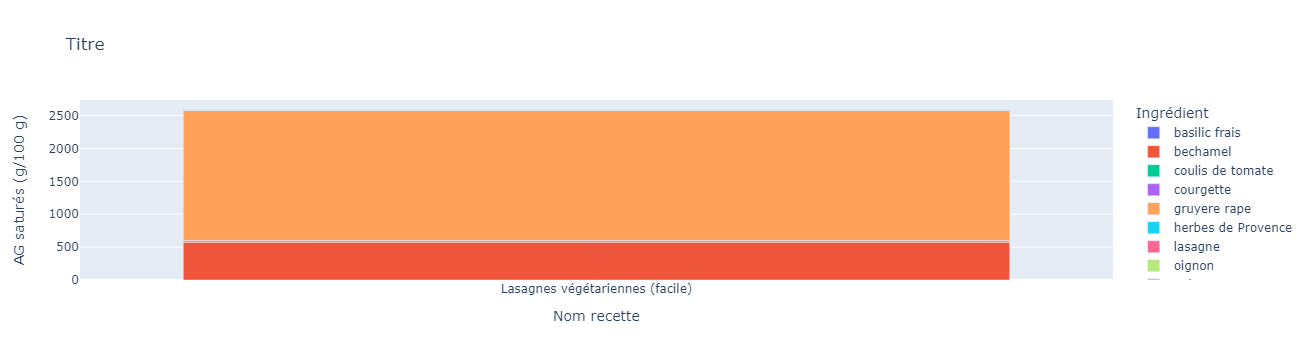

In [ ]:
import plotly.express as px

fig = px.bar(test_all, x="Nom recette", y="AG saturés (g/100 g)", color="Ingrédient", title="Titre")
fig.show()

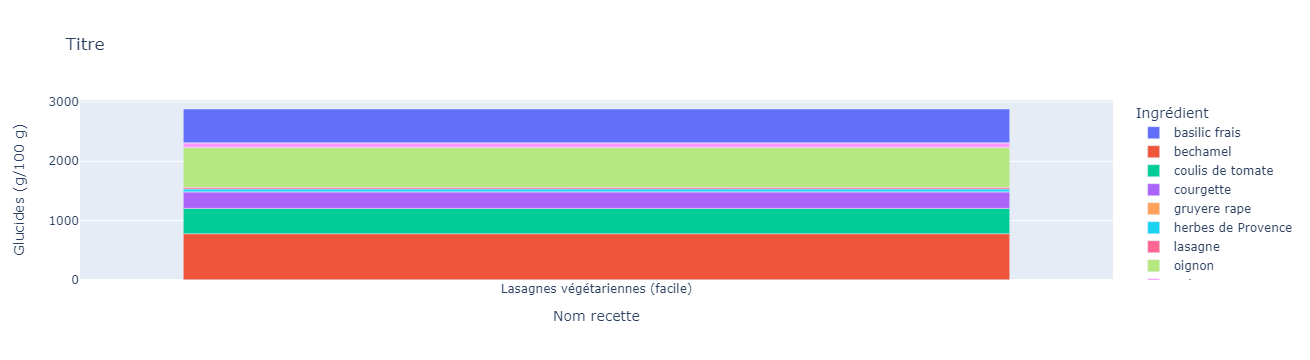

In [49]:
fig = px.bar(test_all, x="Nom recette", y="Glucides (g/100 g)", color="Ingrédient", title="Titre")
fig.show()